<a href="https://colab.research.google.com/github/Buy-me-some-str/practice/blob/main/pytorch_03_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### библиотеки для компьютерного зрения:
* torchvision
* torchvision.datasets
* torchvision.models
* torchvision.transforms
* torch.utils.data.Dataset
* torch.utils.data.DataLoader

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import models
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

### Импортируем датасет FashionMNIST


In [2]:
, transforms
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

image, label

In [4]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [7]:
image, label = train_data[0]
print(f"Image shape:{image.shape}->[color_channels, height, width]")
print(f"Image label:{train_data.classes[label]}")

Image shape:torch.Size([1, 28, 28])->[color_channels, height, width]
Image label:Ankle boot


### Визуализируем данные

Image shapetorch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

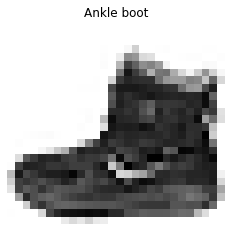

In [8]:
image, label = train_data[0]
print(f"Image shape{image.shape}")
plt.imshow(image.squeeze(), cmap="Greys")
plt.title(train_data.classes[label])
plt.axis(False)

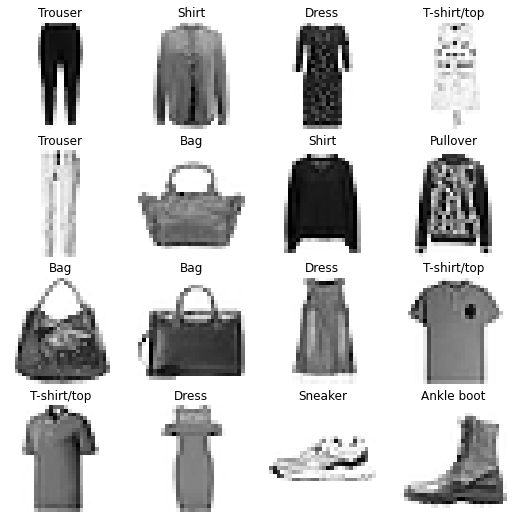

In [9]:
torch.manual_seed = 42
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="Greys")
    plt.title(train_data.classes[label])
    plt.axis(False)

### Подготовим данные 

In [10]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [11]:
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f930e747fa0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f930e747df0>)

In [12]:
print(f"Dataloaders:{train_dataloader, test_dataloader}")
print(f"Lenght of train_dataloader:{len(train_dataloader)}")
print(f"Lenght of test_dataloader:{len(test_dataloader)}")

Dataloaders:(<torch.utils.data.dataloader.DataLoader object at 0x7f930e747fa0>, <torch.utils.data.dataloader.DataLoader object at 0x7f930e747df0>)
Lenght of train_dataloader:1875
Lenght of test_dataloader:313


In [13]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:torch.Size([1, 28, 28])
Label:5


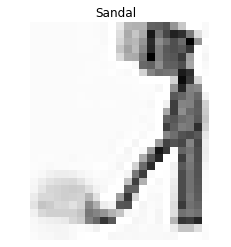

In [14]:
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
image, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image.squeeze(), cmap="Greys")
plt.title(train_data.classes[label])
plt.axis(False)
print(f"Image size:{image.shape}")
print(f"Label:{label}")

### Создание модели

In [15]:
from numpy.ma.core import flatten_mask
flatten_model = nn.Flatten()

x = train_features_batch[0]
x.shape

output = flatten_model(x)
output.shape

torch.Size([1, 784])

In [16]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layers_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
    def forward(self, x):
        return self.layers_stack(x).squeeze()

In [17]:
model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(train_data.classes))
model_0.to("cpu")
model_0

FashionMNISTModelV0(
  (layers_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0.forward(dummy_x)

tensor([-0.3387, -0.1907, -0.1657,  0.1532, -0.2822, -0.0922, -0.2181, -0.0121,
         0.2729,  0.1296], grad_fn=<SqueezeBackward0>)

In [19]:
model_0.state_dict()

OrderedDict([('layers_stack.1.weight',
              tensor([[-0.0079, -0.0148, -0.0090,  ...,  0.0130, -0.0159, -0.0319],
                      [-0.0303,  0.0072,  0.0169,  ..., -0.0134, -0.0270, -0.0223],
                      [ 0.0198,  0.0306, -0.0269,  ...,  0.0163, -0.0224,  0.0233],
                      ...,
                      [-0.0110, -0.0139,  0.0271,  ...,  0.0143,  0.0177, -0.0029],
                      [ 0.0023,  0.0261,  0.0035,  ..., -0.0077, -0.0107,  0.0244],
                      [-0.0130, -0.0207, -0.0209,  ..., -0.0147,  0.0036, -0.0310]])),
             ('layers_stack.1.bias',
              tensor([ 0.0238,  0.0227,  0.0342, -0.0024,  0.0278, -0.0198,  0.0277,  0.0219,
                       0.0244, -0.0253])),
             ('layers_stack.2.weight',
              tensor([[ 0.2646,  0.1871,  0.1486, -0.2790, -0.2883,  0.1827, -0.0399,  0.2177,
                       -0.1822, -0.2895],
                      [ 0.1934, -0.0863,  0.2375, -0.2601,  0.2536,  0.1711, 

In [20]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                             lr=0.1)

In [21]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions already exists")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("hepler_functions.py", "wb") as f:
        f.write(request.content)

In [22]:
from hepler_functions import accuracy_fn

### Создадим функцию для отслеживания скорости работы модели

In [23]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    total_time = end-start
    print(f"Train time on{device}:{total_time:.3f} seconds")
    return total_time
start_time =timer()
end_time  =timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time oncpu:0.000 seconds


3.433700000243789e-05

### Создади обучающий цикл

In [24]:
from tqdm.auto import tqdm

train_time_start_om_cpu = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch{epoch}\n-------")
    train_loss = 0
    # цикл пакетной обработки
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0.forward(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f"Batch {batch}: {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    train_loss /= len(train_dataloader)
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0.forward(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    print(f"\nTrain loss:{train_loss:.4f}|Test loss:{test_loss:.4f}|Test_acc:{test_acc:.2f}")   

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_om_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch0
-------
Batch 0: 0/60000 samples
Batch 400: 12800/60000 samples
Batch 800: 25600/60000 samples
Batch 1200: 38400/60000 samples
Batch 1600: 51200/60000 samples

Train loss:0.5982|Test loss:0.5317|Test_acc:81.81
Epoch1
-------
Batch 0: 0/60000 samples
Batch 400: 12800/60000 samples
Batch 800: 25600/60000 samples
Batch 1200: 38400/60000 samples
Batch 1600: 51200/60000 samples

Train loss:0.4773|Test loss:0.4892|Test_acc:83.02
Epoch2
-------
Batch 0: 0/60000 samples
Batch 400: 12800/60000 samples
Batch 800: 25600/60000 samples
Batch 1200: 38400/60000 samples
Batch 1600: 51200/60000 samples

Train loss:0.4567|Test loss:0.4932|Test_acc:82.05
Train time oncpu:48.115 seconds


### Оценим модель

In [80]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X = X.to(device)
            y = y.to(device)
            y_pred = model.forward(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device="cpu")
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4932393431663513,
 'model_acc': 82.04872204472844}

### Создадим код независящий от устройства

In [27]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Создадим 2 модель

In [48]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layers_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, x: torch.Tensor):
        return self.layers_stack(x)

In [49]:
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(train_data.classes)).to(device)

In [50]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [51]:
from hepler_functions import accuracy_fn
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### Функциональное обучение и улучшение циклов обучения и тестирования

In [72]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               optimizer: torch.optim.Optimizer,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    train_loss = 0
    train_acc = 0
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        X = X.to(device)
        y = y.to(device)
        y_pred = model.forward(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f"Batch {batch}: {batch* len(X)}/{len(data_loader.dataset)}samples.")
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss:{train_loss:.5f}|Train acc:{train_acc:.2f}%")

In [73]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(data_loader):
            X = X.to(device)
            y = y.to(device)
            test_pred = model.forward(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                 y_pred=test_pred.argmax(dim=1))
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss:{test_loss:.5f}|Test acc:{test_acc:.2f}%\n")

In [74]:
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}\n---------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
---------
Batch 0: 0/60000samples.
Batch 400: 12800/60000samples.
Batch 800: 25600/60000samples.
Batch 1200: 38400/60000samples.
Batch 1600: 51200/60000samples.
Train loss:0.36981|Train acc:86.75%
Test loss:0.51421|Test acc:80.64%

Epoch:1
---------
Batch 0: 0/60000samples.
Batch 400: 12800/60000samples.
Batch 800: 25600/60000samples.
Batch 1200: 38400/60000samples.
Batch 1600: 51200/60000samples.
Train loss:0.36670|Train acc:86.80%
Test loss:0.45134|Test acc:84.20%

Epoch:2
---------
Batch 0: 0/60000samples.
Batch 400: 12800/60000samples.
Batch 800: 25600/60000samples.
Batch 1200: 38400/60000samples.
Batch 1600: 51200/60000samples.
Train loss:0.36565|Train acc:86.89%
Test loss:0.43510|Test acc:84.95%

Train time oncuda:31.592 seconds


In [75]:
total_train_time_model_1

31.592361102000268

In [82]:
model_1_results = eval_model(model=model_1,
                              data_loader=test_dataloader,
                              loss_fn=loss_fn,
                              accuracy_fn=accuracy_fn,
                              device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [83]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.4351005256175995,
 'model_acc': 84.95407348242811}

In [84]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4932393431663513,
 'model_acc': 82.04872204472844}

### Сверточная нейронная сеть

In [87]:
class FashionMNISTModelV2(nn.Module):
    """
    Модель основана на архитектуре TinyVGG
    """
    def __init__(self, 
                 input_shape,
                 hidden_units,
                 output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*0,
                      out_features=output_shape)
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier(x)
        print(x.shape)
        return x

In [88]:
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(train_data.classes)).to(device)
            

/usr/local/lib/python3.9/dist-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


### Пошаговое прохождение Con2d и MaxPool2d

In [91]:
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]
print(f"Image batch shape: {image.shape}")
print(f"Single image shape: {test_image.shape}")


Image batch shape: torch.Size([1, 28, 28])
Single image shape: torch.Size([3, 64, 64])


In [100]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=1,
                       padding=1)

conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 64, 64, 64])

In [102]:
test_image.shape

torch.Size([3, 64, 64])